### Importing Libraries

In [2]:
import cv2 as cv
import numpy as np

### Reading Images and Videos 

In [2]:
img=cv.imread(r"D:\Documents\Open CV Learn\2400x1600 image.jpeg")

In [3]:
cv.imshow('SS',img)
cv.waitKey(0)

-1

In [3]:
capture=cv.VideoCapture(r"D:\Documents\Open CV Learn\Video Dump\dog.mp4")
while True:
    isTrue,frame=capture.read()
    cv.imshow('Video',frame)
    if cv.waitKey(0)& 0xff==ord('d'):
        break
capture.release()
cv.destroyAllWindows()

#### Error possibility
1) You can get an (-215:Assertion failed error) if your video runs out of frames.

2) This error can also happen if you specify a wrong path.

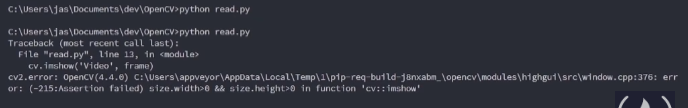

### Resizing and Rescaling Images 

In [5]:
#function to rescale photo and video
#This function is for video that is already there.
def rescaleFrame (frame,scale=0.25):
    width= int(frame.shape[1]*scale)
    height= int(frame.shape[0]*scale)
    dimensions=(width,height)
    
    return cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)

In [6]:
#Rescaling Video
capture=cv.VideoCapture(r"D:\Documents\Open CV Learn\Video Dump\dog.mp4")
while True:
    isTrue,frame=capture.read()
    frame_resized=rescaleFrame(frame)
    cv.imshow('Video',frame_resized)
    if cv.waitKey(20)& 0xff==ord('d'):
        break
capture.release()
cv.destroyAllWindows()


In [7]:
#Rescaling Photo
frame_resized=rescaleFrame(img)
cv.imshow('SS',img)
cv.waitKey(0)

100

In [8]:
#This function is for live video
def changeRes(width,height):
    capture.set(3,width) #3 and 4 basically stands for
    capture.set(4,height)#width and height respectively

### Drawing Shapes & putting Text

In [21]:
# Creating a blank numpy array to 
blank=np.zeros((500,500,3),dtype='uint8')
cv.imshow('Blank',blank)
cv.waitKey(0)

-1

In [4]:
# You can  use an image to draw
img=cv.imread(r"D:\Documents\Open CV Learn\2400x1600 image.jpeg")
cv.imshow('Cat',img)
cv.waitKey(0)

-1

In [18]:
#Paint the image a certain colour
blank[:]=0,0,0#(R,G,B)

#You can also color a certain area using the below code
#blank[200:300,300:400]=0,255,255

#To show the colour
cv.imshow('Green',blank)
cv.waitKey(0)

-1

In [24]:
#Drawing a rectangle
cv.rectangle(blank,(0,0),(250,250),(0,255,0),thickness=2)


#To fill color in Rectangle
cv.rectangle(blank,(0,0),(250,250),(0,255,0),thickness=cv.FILLED)
#thickness=-1 has the same result
cv.imshow('Rectangle',blank)
cv.waitKey(0)


-1

In [26]:
#You can also pass parameters of the rectangle like this
cv.rectangle(blank,(0,0),(blank.shape[1]//2,blank.shape[0]//2),(0,255,0),thickness=cv.FILLED)
cv.imshow('Rectangle',blank)
cv.waitKey(0)

-1

In [30]:
#Drawing a  Circle
cv.circle(blank,(blank.shape[1]//2,blank.shape[0]//2),40,(0,0,255),thickness=3)
cv.imshow('Circle',blank)
cv.waitKey(0)

-1

In [33]:
#Draw a line
cv.line(blank,(0,0),(blank.shape[1]//2,blank.shape[0]//2),(255,0,0),thickness=3)
cv.imshow('Line',blank)
cv.waitKey(0)

-1

In [46]:
#Write text on image
cv.putText(blank,'Hello',(275,275),cv.FONT_HERSHEY_TRIPLEX,1.0,(0,255,0,),2)
cv.imshow('Text',blank)
cv.waitKey(0)

-1